In [1]:
#Imports
import numpy as np
import pandas as pd
import tensorflow.keras.backend as k
from sklearn.preprocessing import MinMaxScaler,  RobustScaler
from tensorflow import keras
from tensorflow.keras import Sequential, layers, optimizers, losses, regularizers
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import Huber



In [2]:
import numpy as np
import pandas as pd

# Read a specific sheet
df = pd.read_excel(r"C:\Users\William\OneDrive\Documents\Data Cleaning\LARUAN.xlsx",
                   sheet_name='04-VAL04H-PM-1 MIRANDA-PSAN_Pre')

df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,PMP,04-VAL04H-PM-1 MIRANDA-PSAN_Pressure,DATETIME,PSI
6,NaN,NaN,2022-01-01 00:00:00,[-11057] Not Enough Values For Calculation
7,NaN,NaN,2022-01-01 00:15:00,[-11057] Not Enough Values For Calculation
8,NaN,NaN,2022-01-01 00:30:00,[-11057] Not Enough Values For Calculation
9,NaN,NaN,2022-01-01 00:45:00,[-11057] Not Enough Values For Calculation


In [3]:
# Don't use this unless you're gonna change your prv dataset.
# to clean

df.drop(['Unnamed: 1', 'Unnamed: 0'], axis=1, inplace=True)
df.to_csv('semicleaned3.csv', index=False)
df.head(100)

,Unnamed: 2,Unnamed: 3
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
95,2022-01-01 22:15:00,[-11057] Not Enough Values For Calculation
96,2022-01-01 22:30:00,[-11057] Not Enough Values For Calculation
97,2022-01-01 22:45:00,[-11057] Not Enough Values For Calculation
98,2022-01-01 23:00:00,[-11057] Not Enough Values For Calculation


In [4]:
import numpy as np
import pandas as pd
#Cleaning changing Not enough values to NaN
df3 = pd.read_csv("semicleaned3.csv", skiprows=6)
df3.columns = ['DATETIME', 'PSI']
df3.replace('[-11057] Not Enough Values For Calculation', np.nan, inplace=True)
#changing data types

df3['PSI'] = pd.to_numeric(df3['PSI'], errors='coerce')
df3['DATETIME'] = pd.to_datetime(df3['DATETIME'], errors='coerce')
df3.dtypes
df3

,DATETIME,PSI
0,2022-01-01 00:00:00,NaN
1,2022-01-01 00:15:00,NaN
2,2022-01-01 00:30:00,NaN
3,2022-01-01 00:45:00,NaN
4,2022-01-01 01:00:00,NaN
...,...,...
101659,2024-11-24 22:45:00,7.81
101660,2024-11-24 23:00:00,9.23
101661,2024-11-24 23:15:00,9.94
101662,2024-11-24 23:30:00,8.52


In [5]:
df_new = df3.copy()  # Creates a separate copy
df_new.index = df_new['DATETIME']
df_new.drop('DATETIME', axis=1, inplace=True)

df_new




,PSI
DATETIME,
2022-01-01 00:00:00,NaN
2022-01-01 00:15:00,NaN
2022-01-01 00:30:00,NaN
2022-01-01 00:45:00,NaN
2022-01-01 01:00:00,NaN
...,...
2024-11-24 22:45:00,7.81
2024-11-24 23:00:00,9.23
2024-11-24 23:15:00,9.94


In [6]:
df_new.loc[df_new['PSI'] > 30, 'PSI'] = np.nan
df_new['PSI'] = df_new['PSI'].interpolate(method='time')
df_new['PSI'] = df_new['PSI'].rolling(window=5, center=True).median()

In [7]:
df_new.fillna(0, inplace=True)

df_new

,PSI
DATETIME,
2022-01-01 00:00:00,0.00
2022-01-01 00:15:00,0.00
2022-01-01 00:30:00,0.00
2022-01-01 00:45:00,0.00
2022-01-01 01:00:00,0.00
...,...
2024-11-24 22:45:00,8.52
2024-11-24 23:00:00,8.52
2024-11-24 23:15:00,9.23


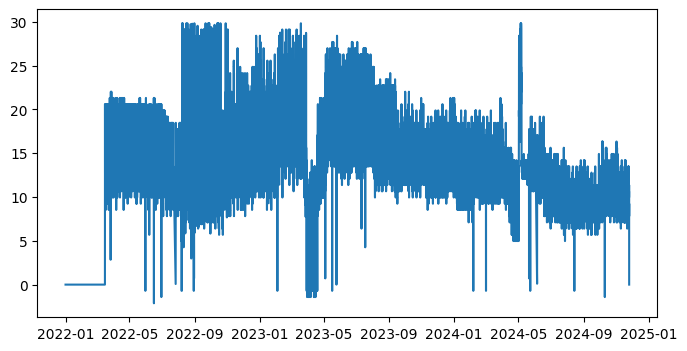

In [8]:
#visualizing my dataframe
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

# Plot using numerical indices on the x-axis
plt.plot(df_new.index, df_new['PSI'], label='PSI')
# Formatting




In [9]:
df_new['PSI']




DATETIME
2022-01-01 00:00:00    0.00
2022-01-01 00:15:00    0.00
2022-01-01 00:30:00    0.00
2022-01-01 00:45:00    0.00
2022-01-01 01:00:00    0.00
                       ... 
2024-11-24 22:45:00    8.52
2024-11-24 23:00:00    8.52
2024-11-24 23:15:00    9.23
2024-11-24 23:30:00    0.00
2024-11-24 23:45:00    0.00
Name: PSI, Length: 101664, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
len(df_new)



101664

In [11]:
train = df_new.iloc[:98784]
test = df_new.iloc[98784:]
train

,PSI
DATETIME,
2022-01-01 00:00:00,0.00
2022-01-01 00:15:00,0.00
2022-01-01 00:30:00,0.00
2022-01-01 00:45:00,0.00
2022-01-01 01:00:00,0.00
...,...
2024-10-25 22:45:00,9.23
2024-10-25 23:00:00,9.23
2024-10-25 23:15:00,9.23


In [12]:
len(train)


98784

In [13]:
len(test)

2880

In [14]:
test

,PSI
DATETIME,
2024-10-26 00:00:00,9.94
2024-10-26 00:15:00,9.94
2024-10-26 00:30:00,9.23
2024-10-26 00:45:00,9.23
2024-10-26 01:00:00,9.94
...,...
2024-11-24 22:45:00,8.52
2024-11-24 23:00:00,8.52
2024-11-24 23:15:00,9.23


In [15]:
scaler.fit(df_new)


MinMaxScaler()

In [16]:
scaled_data = scaler.transform(df_new)


In [17]:

# Function to create sequences while preserving the time series order
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])  # Predicting 'DATA (psi)'
    return np.array(X), np.array(y)

SEQ_LENGTH = 60  # Capture longer-term patterns
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Reshape for LSTM input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-Test Split (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


# Print shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (81283, 60, 1)
X_test shape: (20321, 60, 1)
y_train shape: (81283, 1)
y_test shape: (20321, 1)


In [18]:
#building model
model = Sequential([
    LSTM(96, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Final output
])

# Compile model with Huber loss and Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss=Huber(delta=1),
    metrics=['mae']
)

# Reduce LR if validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)

# Model checkpoint to save the best model
model_checkpoint = ModelCheckpoint(
    filepath="PredictOneHour.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
    verbose=1
)

# Train the model
#history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[ reduce_lr, model_checkpoint],
    verbose=1
)

IndentationError: unexpected indent (170204124.py, line 32)

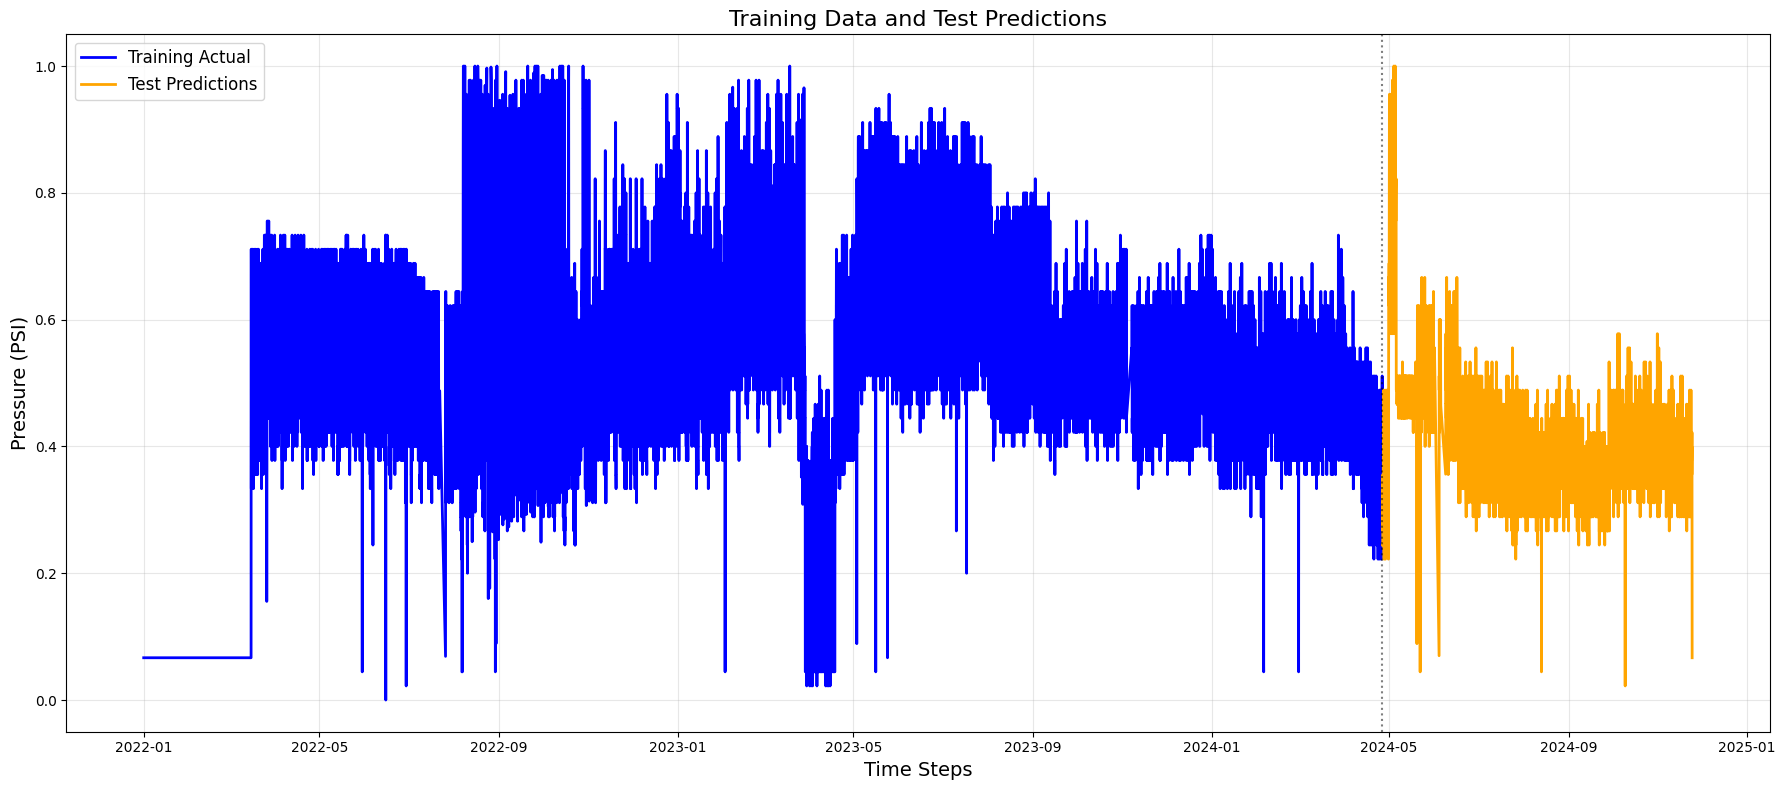

In [20]:
# Plot 1: Training Data and Test Predictions
plt.figure(figsize=(18, 8))

# Plot training actual (history)
plt.plot(df_new.index[:len(y_train)], y_train, 
         label="Training Actual", color="blue", linewidth=2)

# Plot test predictions
plt.plot(df_new.index[len(y_train):len(y_train) + len(y_test)], y_test, 
         label="Test Predictions", color="orange", linewidth=2)

plt.title("Training Data and Test Predictions", fontsize=16)
plt.xlabel("Time Steps", fontsize=14)
plt.ylabel("Pressure (PSI)", fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.axvline(x=df_new.index[len(y_train) - 1], color='black', linestyle=':', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

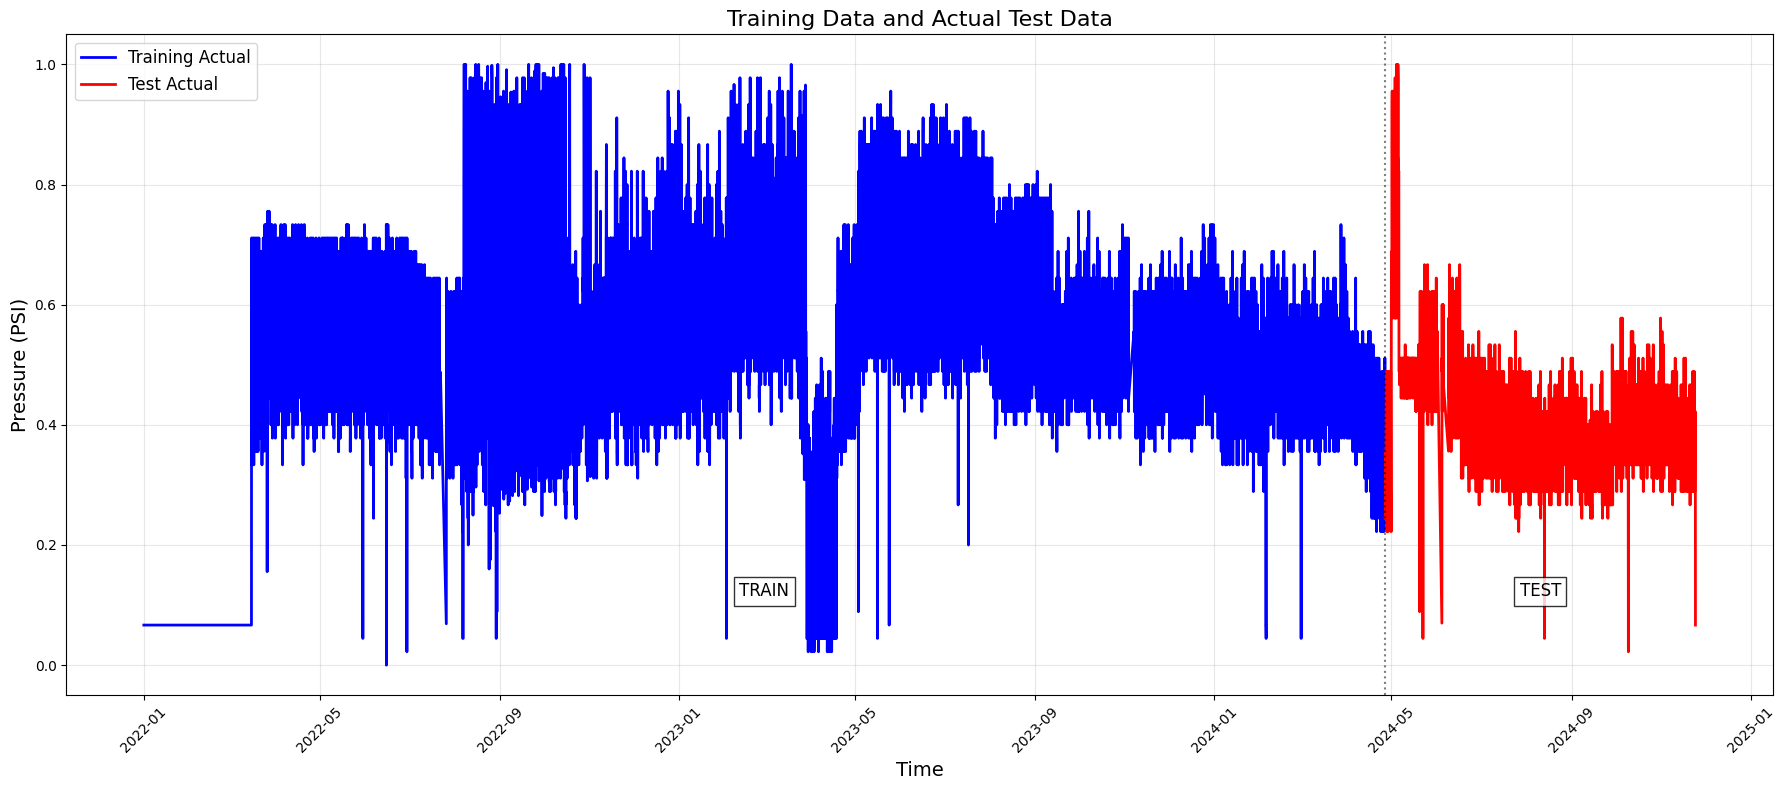

In [ ]:
# Plot 2: Training Data and Actual Test Data
plt.figure(figsize=(18, 8))

# Plot training actual (history)
plt.plot(df_new.index[:len(y_train)], y_train, 
         label="Training Actual", color="blue", linewidth=2)

# Plot test actual (ground truth)
plt.plot(df_new.index[len(y_train):len(y_train) + len(y_test)], y_test,
         label="Test Actual", color="red", linewidth=2)

plt.title("Training Data and Actual Test Data", fontsize=16)
plt.xlabel("Time", fontsize=14)  # Changed from "Time Steps" to "Time" since using datetime index
plt.ylabel("Pressure (PSI)", fontsize=14)
plt.legend(fontsize=12, loc='upper left')

# Add vertical separator between train and test
plt.axvline(x=df_new.index[len(y_train) - 1], 
            color='black', linestyle=':', alpha=0.5)

# Add region labels (positioned at 15% of y-axis height)
y_pos = plt.ylim()[0] + 0.15 * (plt.ylim()[1] - plt.ylim()[0])
plt.text(df_new.index[len(y_train)//2], y_pos, "TRAIN", 
         ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.text(df_new.index[len(y_train) + len(y_test)//2], y_pos, "TEST", 
         ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)  # Rotate datetime labels for better readability
plt.tight_layout()
plt.show()

636/636 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step


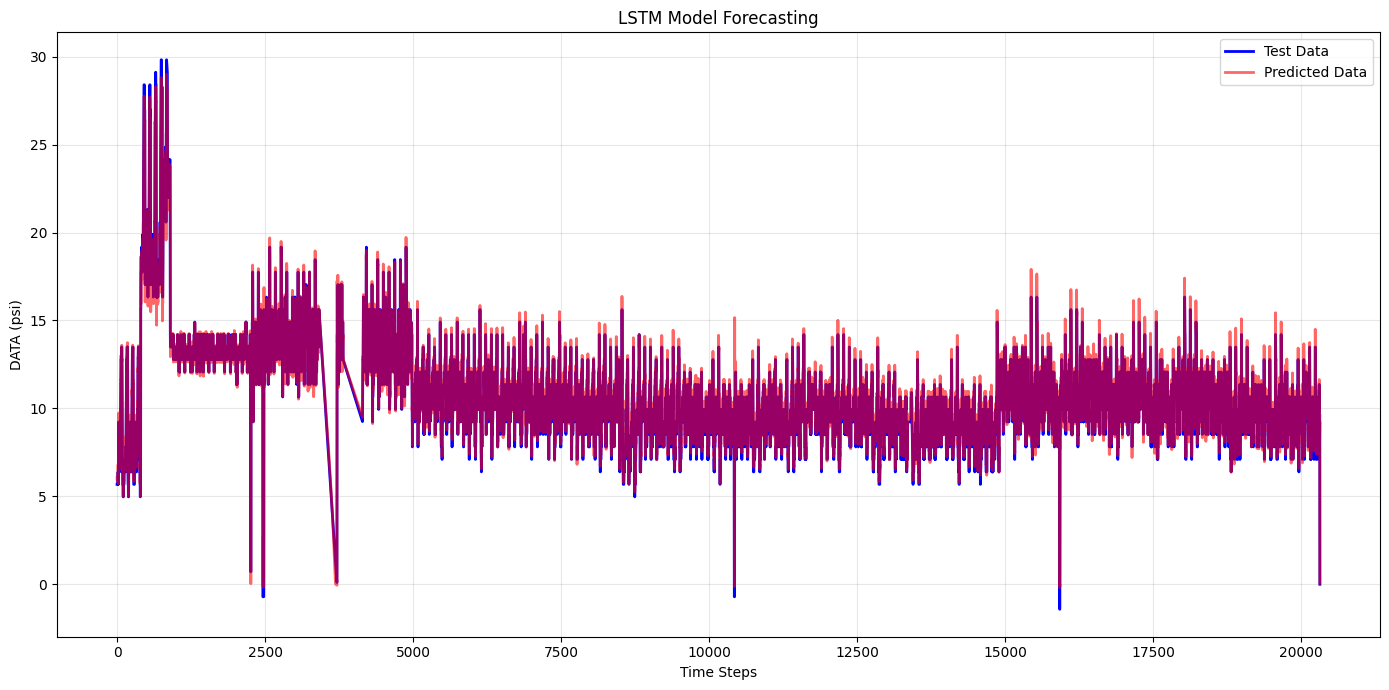

In [22]:
# Checking the prediction
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model("PredictOneHour.keras")

# Generate predictions for the test set
y_pred = best_model.predict(X_test)

# Inverse transform the scaled data back to original scale
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))

import matplotlib.pyplot as plt
import numpy as np

# Create time indices for plotting
time_index = np.arange(len(y_test_actual))

# Plotting the actual vs predicted data
plt.figure(figsize=(14, 7))
plt.plot(time_index, y_test_actual, label="Test Data", color="blue", linewidth=2)
plt.plot(time_index, y_pred_actual, label="Predicted Data", color="red", linewidth=2, alpha=0.6)

plt.title("LSTM Model Forecasting")
plt.xlabel("Time Steps")
plt.ylabel("DATA (psi)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

636/636 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step


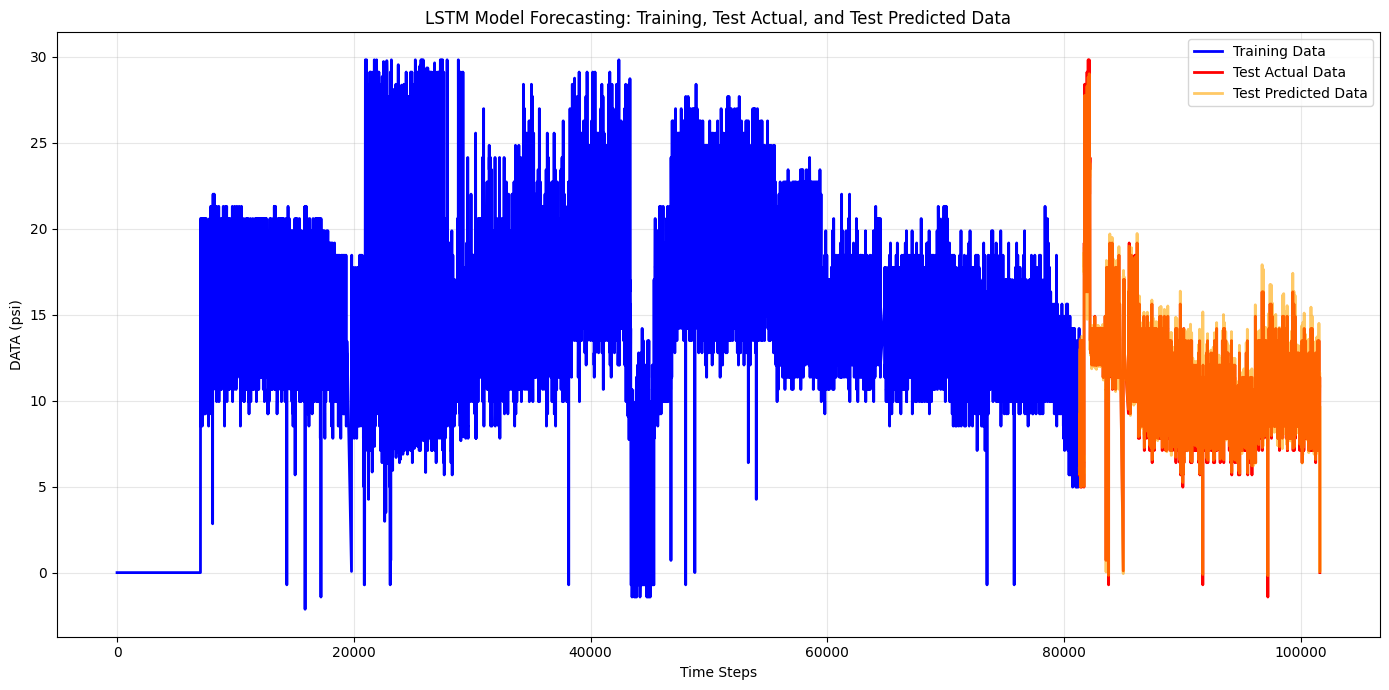

In [24]:
# Plot 3: Training Data, Test Actual, and Test Predicted Data
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model("PredictOneHour.keras")

# Generate predictions for the test set
y_pred = best_model.predict(X_test)

# Inverse transform the scaled data back to original scale
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))

import matplotlib.pyplot as plt
import numpy as np

# Create time indices for plotting
train_index = np.arange(len(y_train_actual))
test_index = np.arange(len(y_train_actual), len(y_train_actual) + len(y_test_actual))

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(train_index, y_train_actual, label="Training Data", color="blue", linewidth=2)

# Plot test actual data
plt.plot(test_index, y_test_actual, label="Test Actual Data", color="red", linewidth=2)

# Plot test predicted data
plt.plot(test_index, y_pred_actual, label="Test Predicted Data", color="orange", linewidth=2, alpha=0.6)

# Formatting the plot
plt.title("LSTM Model Forecasting: Training, Test Actual, and Test Predicted Data")
plt.xlabel("Time Steps")
plt.ylabel("DATA (psi)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

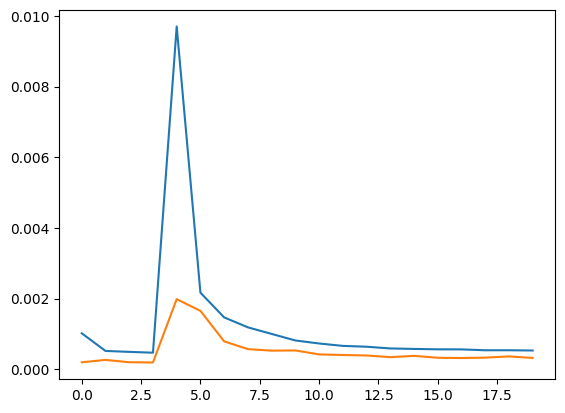

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
loss_per_epoch = model.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# SMAPE function
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# MAPE function
def mape(y_true, y_pred):
    return 100 * np.mean(np.abs((y_true - y_pred) / y_true))

def mape2(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (np.abs((y_true - y_pred) / y_true)).mean() * 100

# Generate predictions for the test set
y_pred = model.predict(X_test)

# Calculate SMAPE
smape_value = smape(y_test, y_pred)
print(f"SMAPE: {smape_value:.2f}%")

# Calculate MAPE
mape_value = mape(y_test, y_pred)
print(f"MAPE: {mape_value:.4f}%")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae:.4f}')

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.4f}')

636/636 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step
SMAPE: 4.14%
MAPE: 4.2156%
MAE: 0.0163
RMSE: 0.0253
